## **Lab 3: Logistic Regression**
### **Name: Diego Bolanos**
### **Id: 8946481**

## Data Preprocessing Tasks

In [2]:
import pandas as pd
import numpy as np

# Load the dataset from a CSV file
creditcard_df = pd.read_csv('/Users/diegobolanos/Downloads/creditcard.csv')

# 1. Detect and handle outliers for all the numerical features using Z-Score approach

# Exclude the Class column from the dataset
exclude_columns = ['Class']

for col in creditcard_df.columns:
    if col in exclude_columns:
        continue

    # Calculate the mean and standard deviation of the column
    feature_mean = creditcard_df[col].mean()
    feature_std = creditcard_df[col].std()

    # Calculate the z-score for each feature in the column
    z_scores = (creditcard_df[col] - feature_mean) / feature_std

    # Identify outliers using 3 as a threshold
    outliers = creditcard_df[z_scores > 3]
    
    creditcard_outliers_removed_df = creditcard_df.drop(outliers.index, axis=0)

print("Original dataset", creditcard_df.shape)
print("Outliers removed:", creditcard_outliers_removed_df.shape)

Original dataset (284807, 31)
Outliers removed: (280731, 31)


In [3]:
# 2. Normalize Numerical Features

# Using standarization (z-score) approach

cols = ['Amount', 'Time']

for col in cols:
    
    feature_mean = creditcard_df[col].mean()
    feature_std = creditcard_df[col].std()
    
    creditcard_outliers_removed_df[col] = (creditcard_outliers_removed_df[col] - feature_mean) / feature_std

print("Normalized dataset", creditcard_outliers_removed_df.head())

Normalized dataset        Time        V1        V2        V3        V4        V5        V6   
0 -1.996580 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  \
1 -1.996580  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996558 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996558 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996537 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24   
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  \
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amou

## Descriptive Analytics Tasks

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Analyze the distribution of fraud vs non-fraud transactions
fraud_count = creditcard_outliers_removed_df['Class'].value_counts()
print("Fraud vs Non-Fraud Transactions:\n", fraud_count, "\n")

Fraud vs Non-Fraud Transactions:
 Class
0    280250
1       481
Name: count, dtype: int64 



In [5]:
# 2. Analyze the correlation
fraud_non_fraud_correlation = creditcard_outliers_removed_df.corr()
sorted_non_fraud_correlation = fraud_non_fraud_correlation['Class'].sort_values(ascending=False)
print("Correlation between fraud/non-fraud transactions:\n",sorted_non_fraud_correlation)

Correlation between fraud/non-fraud transactions:
 Class     1.000000
V11       0.155274
V4        0.134784
V2        0.105400
V21       0.042275
V19       0.034402
V20       0.026258
V8        0.020736
V27       0.016980
V28       0.011254
Amount    0.009475
V26       0.004621
V25       0.004505
V23       0.001248
V22       0.000681
V15      -0.004330
V13      -0.004428
V24      -0.007415
Time     -0.012600
V6       -0.045846
V9       -0.098794
V5       -0.105025
V1       -0.106722
V18      -0.112220
V16      -0.198211
V3       -0.199201
V7       -0.216752
V10      -0.219272
V12      -0.261542
V14      -0.303950
V17      -0.326746
Name: Class, dtype: float64


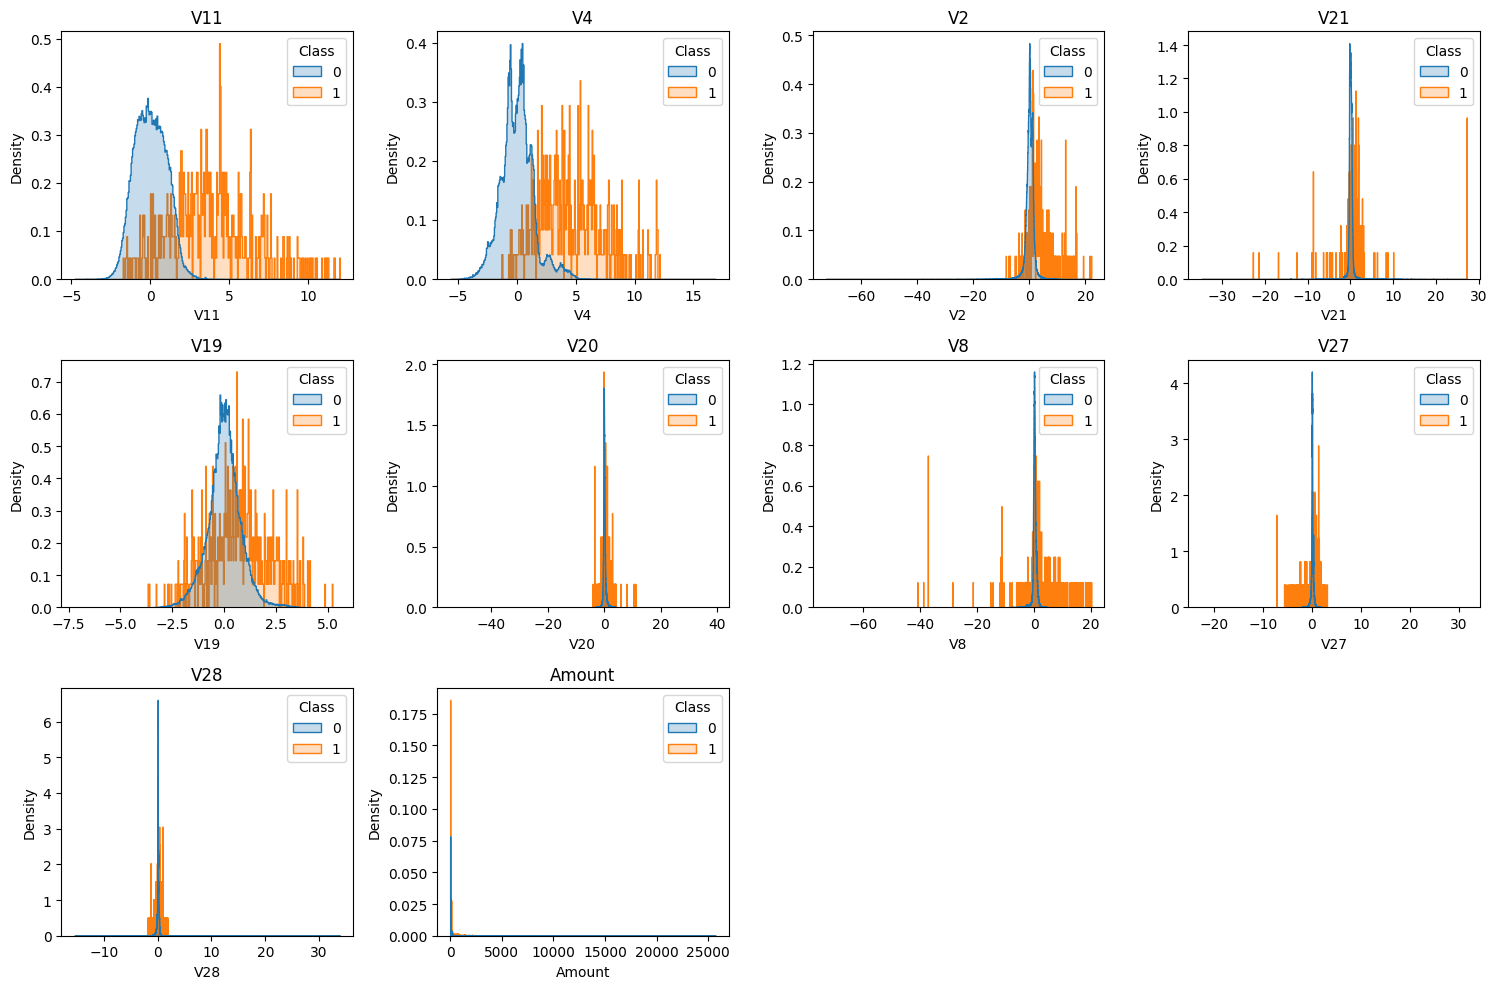

In [6]:
# Comment on which features are highly correlated with fraud/non-fraud transactions

# 3. Plot distributions of top 10 features
top_features = sorted_non_fraud_correlation.index[1:11]
plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(creditcard_df, x=feature, hue='Class', element='step', stat='density',  common_norm=False)
    plt.title(feature)
    
plt.tight_layout()
plt.show()

# ML Model Training and Testing Tasks

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Split data into features and target
X = creditcard_outliers_removed_df.drop('Class', axis=1)
y = creditcard_outliers_removed_df['Class']

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression()

scores_log_reg = cross_validate(log_reg, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

print("Accuracy:", scores_log_reg['test_accuracy'].mean().round(2))
print("Precision:", scores_log_reg['test_precision'].mean().round(2))
print("Recall:", scores_log_reg['test_recall'].mean().round(2))
print("F1-Score:", scores_log_reg['test_f1'].mean().round(2))

Accuracy: 1.0
Precision: 0.89
Recall: 0.64
F1-Score: 0.74


In [9]:
knn = KNeighborsClassifier()
scores_knn = cross_validate(knn, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

print("Accuracy:", scores_knn['test_accuracy'].mean().round(2))
print("Precision:", scores_knn['test_precision'].mean().round(2))
print("Recall:", scores_knn['test_recall'].mean().round(2))
print("F1-Score:", scores_knn['test_f1'].mean().round(2))


Accuracy: 1.0
Precision: 0.92
Recall: 0.78
F1-Score: 0.85


In [10]:
svm = SVC()
svm = cross_validate(knn, X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

print("Accuracy:", svm['test_accuracy'].mean().round(2))
print("Precision:", svm['test_precision'].mean().round(2))
print("Recall:", svm['test_recall'].mean().round(2))
print("F1-Score:", svm['test_f1'].mean().round(2))

Accuracy: 1.0
Precision: 0.92
Recall: 0.78
F1-Score: 0.85


In [11]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [12]:
# 4. Print the learned coefficients
print("Coefficients:", log_reg.coef_)

# Which feature has the highest weight?
highest_weight_feature_i = np.argmax(log_reg.coef_)
highest_weight_feature = X_train.columns[highest_weight_feature_i]
print("The feature with the highest weight is:", highest_weight_feature)

Coefficients: [[-0.15217344  0.0559191   0.08222109  0.02000453  0.68721072  0.17986855
  -0.13334876 -0.08724545 -0.16947068 -0.25065066 -0.78079846  0.01250169
   0.01425962 -0.26594573 -0.51581264 -0.0792206  -0.13758726 -0.0206369
  -0.04431845  0.05184306 -0.4526697   0.35720554  0.56562226 -0.10888932
   0.15154889 -0.13891982  0.0864276  -0.67857342 -0.26398552  0.9662642 ]]
The feature with the highest weight is: Amount


In [13]:
# 5. Evaluate model performance
pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1-Score:", f1_score(y_test, pred))

Accuracy: 0.999341015548471
Precision: 0.8524590163934426
Recall: 0.65
F1-Score: 0.7375886524822695


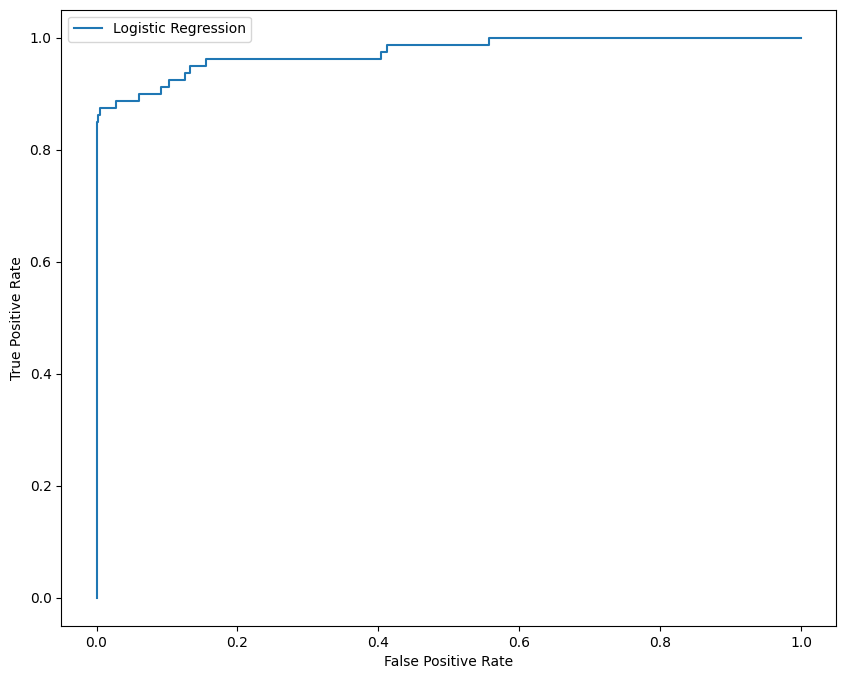

AUC: 0.9739080029250717


In [14]:
# Plot the ROC curve and print the AUC of the model on the test set
pred_proba = log_reg.predict_proba(X_test)
pred_proba = pred_proba[:, 1]

# Get false positive rate, true positive rate and threshold
fpr, tpr, _ = roc_curve(y_test, pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

The AUC is very close to 1, which means that the model seems to be good at distinguishing between positive and negative classes, however the other metrics such as precision, recall and f1-score are not performing very well. This is because the data is imbalanced and for the best performance is necessary to balance the data.

In [15]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model on the oversampled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Evaluate the model on the test data
y_pred_smote = model.predict(X_test)
print("Performance with SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1-Score:", f1_score(y_test, y_pred_smote))

# Train the model without SMOTE
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)
print("\nPerformance without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Performance with SMOTE:
Accuracy: 0.975243557091207
Precision: 0.048898071625344354
Recall: 0.8875
F1-Score: 0.0926892950391645

Performance without SMOTE:
Accuracy: 0.999341015548471
Precision: 0.8524590163934426
Recall: 0.65
F1-Score: 0.7375886524822695


In [16]:
# 2. Train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# 3. Train the SVM
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

# 4. Evaluate the models on the test data
print("KNN performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn))

print("\nSVM performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-Score:", f1_score(y_test, y_pred_svm))

KNN performance:
Accuracy: 0.9995547402354533
Precision: 0.8873239436619719
Recall: 0.7875
F1-Score: 0.8344370860927152

SVM performance:
Accuracy: 0.9995725506260352
Precision: 0.9242424242424242
Recall: 0.7625
F1-Score: 0.8356164383561645


The KNN and SVC classification can perform better than the logistic regression model, but without balancing the data, the results still not good enough.